# Data Science Intern at Let's Grow More LGMVIP April,23

# Intermediate Level Task

# Iris Flower Classification using Decision Tree Algorithm

# Ranit Mukherjee

In [1]:
#Importing the required libraries-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading our dataset
mydata = pd.read_csv("IRIS.csv")

In [3]:
#showing the 1st five rows of our dataset
mydata.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
mydata.shape

(150, 5)

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
mydata.describe()   ##getting some basic statistical measurements

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
mydata.columns   # #showing the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
mydata.isnull().sum()   #checking the null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Visualization

Text(0.5, 0, 'species')

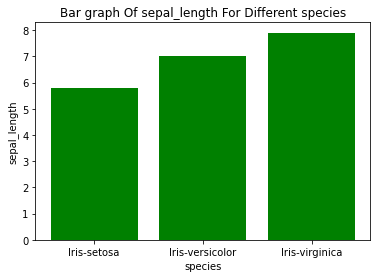

In [9]:
plt.bar(mydata['species'],mydata["sepal_length"], color = "g")
plt.title('Bar graph Of sepal_length For Different species')
plt.ylabel('sepal_length')
plt.xlabel('species')

Text(0.5, 0, 'species')

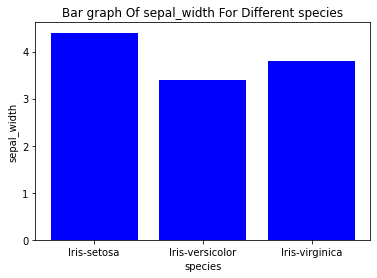

In [10]:
plt.bar(mydata['species'],mydata['sepal_width'], color = "b")
plt.title('Bar graph Of sepal_width For Different species')
plt.ylabel('sepal_width')
plt.xlabel('species')

[Text(0.5, 1.0, 'Bar graph Of petal_length For Different species')]

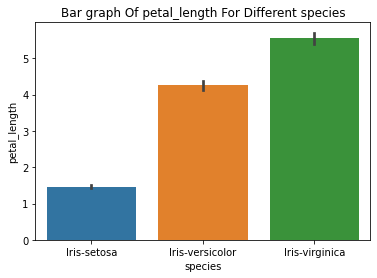

In [11]:
sns.barplot(x = 'species',y = 'petal_length',data = mydata).set(title='Bar graph Of petal_length For Different species')

[Text(0.5, 1.0, 'Bar graph Of petal_width For Different species')]

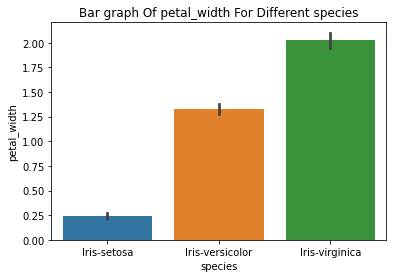

In [12]:
sns.barplot(x = 'species',y = 'petal_width',data = mydata).set(title='Bar graph Of petal_width For Different species')

In [13]:
count = mydata['species'].value_counts()
count.to_frame()

,species
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


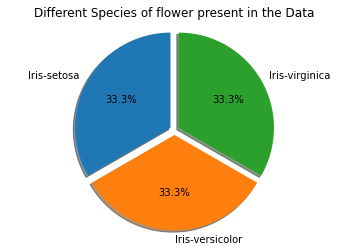

In [14]:
label = count.index.tolist()
val = count.values.tolist()
exp = (0.05,0.05,0.05)
fig,ax = plt.subplots()
ax.pie(val, explode=exp, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Different Species of flower present in the Data")
ax.axis('equal')
plt.show()

<AxesSubplot:>

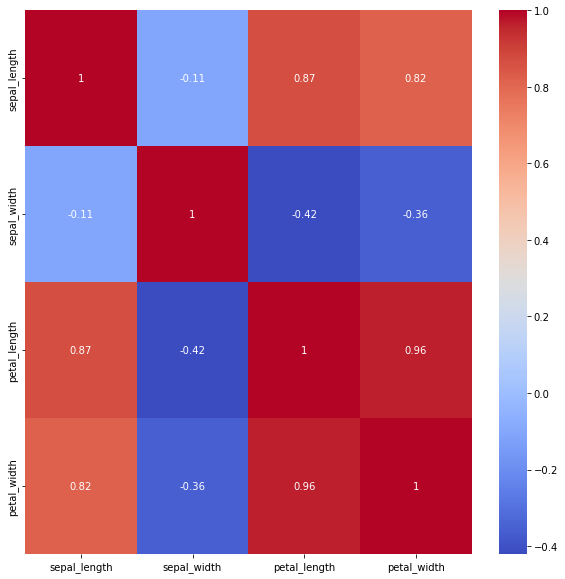

In [15]:
#showing the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(mydata.corr(), annot=True, ax=ax, cmap='coolwarm')

In [16]:
#identifying independent and dependent variables 
X = mydata.drop("species",axis=1)  #independent variables
y = mydata["species"]   #dependent variable

In [17]:
#standardizing our data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X = std.fit_transform(X)

In [18]:
#splitting our dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [19]:
#model selection and fitting
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred  

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
#calculating the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
acc = accuracy_score(y_test, y_pred)
print("The Accuracy of the Decision Tree Algorithms is : ", str(acc*100) + "%")
     

The Accuracy of the Decision Tree Algorithms is :  96.66666666666667%


In [21]:
#creating the confusion matrix
confusionMatrix = confusion_matrix(y_test, y_pred)
confusionMatrix
     

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [22]:
#showing the actual and predicted values together in a table/dataframe
data = {
  "actual values": np.array(y_test),
  "predicted values": np.array(y_pred)
}

final_prediction = pd.DataFrame(data)
final_prediction

,actual values,predicted values
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-versicolor,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [23]:
col = mydata.columns.tolist()
print(col)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


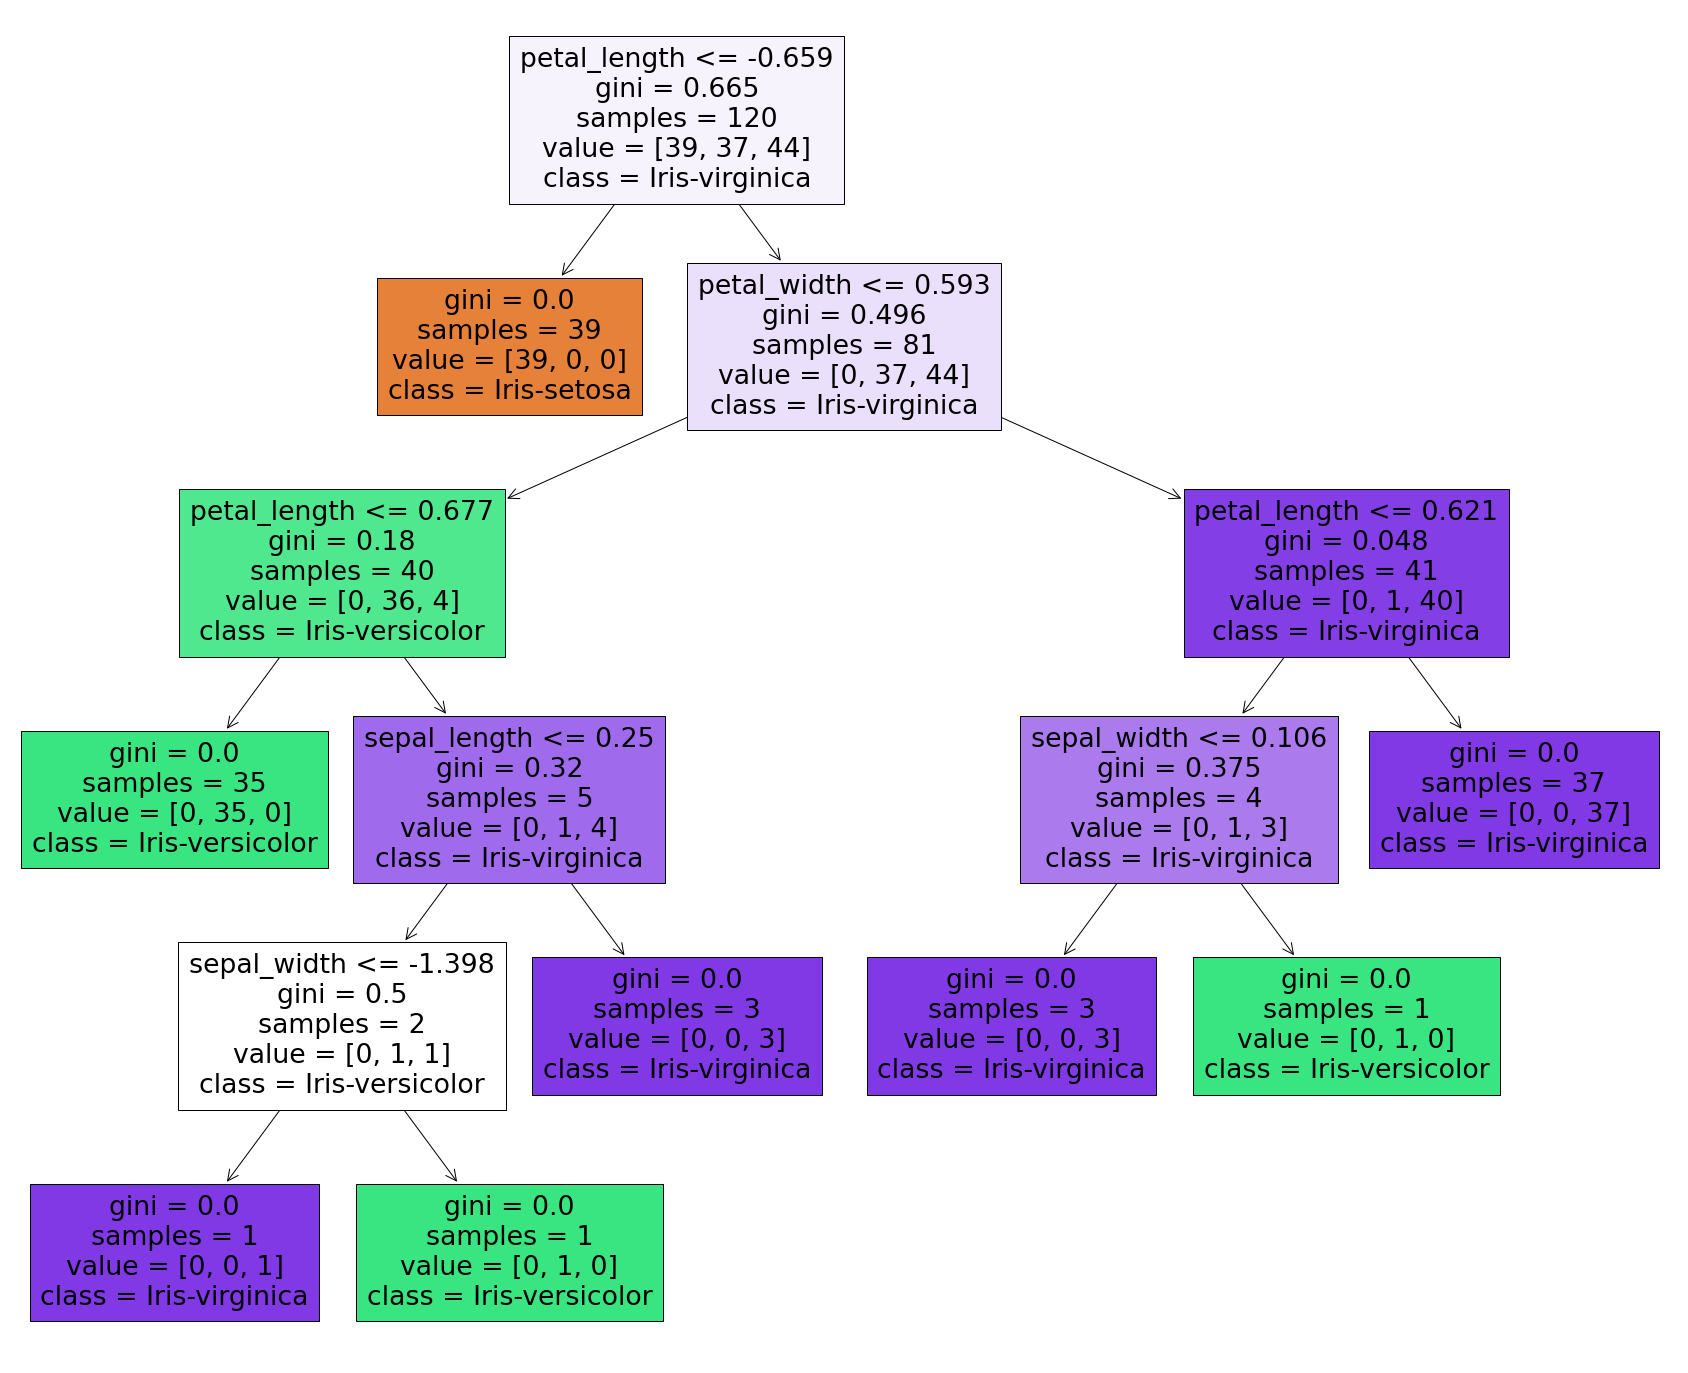

In [24]:
#creating the model diagram
from sklearn.tree import plot_tree
lst = mydata['species'].unique().tolist()
fig = plt.figure(figsize=(30, 25))
tree_img = plot_tree(model, feature_names = col, class_names = lst, filled = True)

# Conclusion

**After fitting a Decision Tree Classification model from the accuracy we can see that our model test accuracy is approximately 96.67% which is satisfying.**